# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


## Encode Categorical Variables

In [3]:
encoded_df = encode_categorical_variables(cleaned_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95393 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95393 non-null  int32              
 1   BatchId               95393 non-null  int32              
 2   AccountId             95393 non-null  int32              
 3   SubscriptionId        95393 non-null  int32              
 4   CustomerId            95393 non-null  int32              
 5   CurrencyCode          95393 non-null  int32              
 6   CountryCode           95393 non-null  int64              
 7   ProviderId            95393 non-null  int32              
 8   ProductId             95393 non-null  int32              
 9   ProductCategory       95393 non-null  int32              
 10  ChannelId             95393 non-null  int32              
 11  Amount                95393 non-null  float64            
 12  Value    

In [4]:
encoded_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,77920,46849,2476,3517,2569,0,256,5,1,0,2,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,75597,31670,3203,2354,2569,0,256,3,19,2,1,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,39772,60107,2699,994,2791,0,256,5,0,0,2,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,48595,1792,3335,972,3714,0,256,0,11,8,2,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,41241,48807,3203,2354,3714,0,256,3,19,2,1,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## Feature Aggregation (RFMS) 

### RFMS Features:

##### Recency(R): Time since a customer's last purchase or transaction.

##### Frequency(F): Number of purchases or transactions a customer has made.

##### Monetary(M): Total amount of money a customer has spent with the business.

##### Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [5]:
aggregated_df = create_aggregate_features(encoded_df)
aggregated_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency
0,77920,46849,2476,3517,2569,0,256,5,1,0,...,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,0
2,39772,60107,2699,994,2791,0,256,5,0,0,...,500.0,500,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,81
3,48595,1792,3335,972,3714,0,256,0,11,8,...,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,5
6,13624,13746,1177,801,1315,0,256,4,16,0,...,10000.0,10000,2018-11-15 03:44:31+00:00,4,0,93400.00,3220.689655,29,5493.966126,5
8,59112,89971,1423,3106,3337,0,256,5,1,0,...,500.0,500,2018-11-15 04:14:59+00:00,2,0,8060.00,2015.000000,4,3342.588817,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94889,62966,88368,871,1492,1035,0,256,0,6,2,...,40000.0,40000,2019-02-12 18:49:17+00:00,2,0,80000.00,40000.000000,2,0.000000,0
94915,44113,7045,720,922,903,0,256,0,16,0,...,500.0,500,2019-02-12 19:12:13+00:00,4,0,2000.00,500.000000,4,0.000000,0
94966,65846,70660,1371,2788,1491,0,256,0,6,2,...,1000.0,1000,2019-02-12 20:03:11+00:00,2,0,980.00,245.000000,4,959.218432,0
94995,40094,56479,3296,2767,3680,0,256,0,6,2,...,10000.0,10000,2019-02-12 21:24:12+00:00,2,0,25000.00,12500.000000,2,3535.533906,0


outlier_indices = detect_rfms_outliers(rfms_df )

## Time Features

In [6]:
time_df = extract_time_features(aggregated_df)
time_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,77920,46849,2476,3517,2569,0,256,5,1,0,...,0,109921.75,923.712185,119,3042.294251,0,2,15,11,2018
2,39772,60107,2699,994,2791,0,256,5,0,0,...,0,1000.00,500.000000,2,0.000000,81,2,15,11,2018
3,48595,1792,3335,972,3714,0,256,0,11,8,...,0,228727.20,6019.136842,38,17169.241610,5,3,15,11,2018
6,13624,13746,1177,801,1315,0,256,4,16,0,...,0,93400.00,3220.689655,29,5493.966126,5,3,15,11,2018
8,59112,89971,1423,3106,3337,0,256,5,1,0,...,0,8060.00,2015.000000,4,3342.588817,88,4,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94889,62966,88368,871,1492,1035,0,256,0,6,2,...,0,80000.00,40000.000000,2,0.000000,0,18,12,2,2019
94915,44113,7045,720,922,903,0,256,0,16,0,...,0,2000.00,500.000000,4,0.000000,0,19,12,2,2019
94966,65846,70660,1371,2788,1491,0,256,0,6,2,...,0,980.00,245.000000,4,959.218432,0,20,12,2,2019
94995,40094,56479,3296,2767,3680,0,256,0,6,2,...,0,25000.00,12500.000000,2,3535.533906,0,21,12,2,2019


## RFM Score 

In [7]:
score_df = rfms_segmentation(time_df)
score_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score,RFM_Score
0,77920,46849,2476,3517,2569,0,256,5,1,0,...,0,2,15,11,2018,3,3,3,1,3331
2,39772,60107,2699,994,2791,0,256,5,0,0,...,81,2,15,11,2018,1,1,1,3,1113
3,48595,1792,3335,972,3714,0,256,0,11,8,...,5,3,15,11,2018,2,3,3,1,2331
6,13624,13746,1177,801,1315,0,256,4,16,0,...,5,3,15,11,2018,2,3,3,1,2331
8,59112,89971,1423,3106,3337,0,256,5,1,0,...,88,4,15,11,2018,1,1,1,1,1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94889,62966,88368,871,1492,1035,0,256,0,6,2,...,0,18,12,2,2019,3,1,3,3,3133
94915,44113,7045,720,922,903,0,256,0,16,0,...,0,19,12,2,2019,3,1,1,3,3113
94966,65846,70660,1371,2788,1491,0,256,0,6,2,...,0,20,12,2,2019,3,1,1,1,3111
94995,40094,56479,3296,2767,3680,0,256,0,6,2,...,0,21,12,2,2019,3,1,2,1,3121


## StandardScaler Transform

In [8]:
standardized_df = standardize_features(score_df)
standardized_df.head()

,Amount,Value,PricingStrategy,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score
0,-0.392068,-0.431080,-0.476430,-0.018197,0.013577,-0.292678,0.819314,-0.332529,-1.032715,-2.127044,-0.180975,0.68871,-0.800597,1.440917,0.948357,0.909816,-0.212693
2,-0.410714,-0.449942,-0.476430,-0.018197,-0.042221,-0.320677,-0.274279,-0.534934,2.084539,-2.127044,-0.180975,0.68871,-0.800597,-0.926780,-1.361184,-1.487528,4.711036
3,0.316467,0.353602,-0.476430,-0.018197,0.074437,0.044034,0.062211,0.607345,-0.840292,-1.925108,-0.180975,0.68871,-0.800597,0.257069,0.948357,0.909816,-0.212693
6,-0.056447,-0.091554,1.550748,-0.018197,0.005113,-0.140891,-0.021912,-0.169418,-0.840292,-1.925108,-0.180975,0.68871,-0.800597,0.257069,0.948357,0.909816,-0.212693
8,-0.410714,-0.449942,-0.476430,-0.018197,-0.038604,-0.220564,-0.255586,-0.312550,2.353931,-1.723173,-0.180975,0.68871,-0.800597,-0.926780,-1.361184,-1.487528,-0.212693


## Visualizing Transactions in the RFMS space

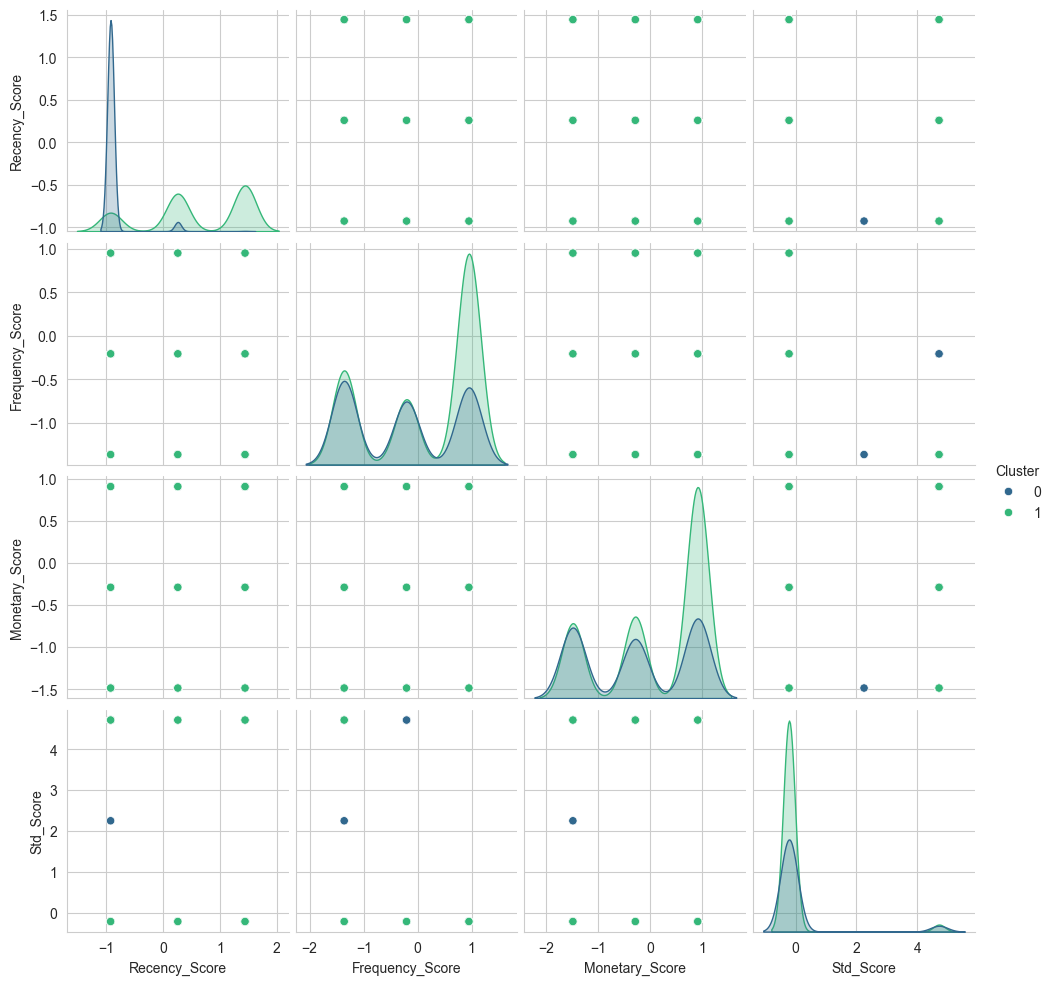

In [9]:
cluster_centers = visualize_rfms(standardized_df)

In [10]:
cluster_centers

array([[ 0.15339026,  0.14473156, -0.0341525 , -0.01819686,  0.00605905,
         0.14024666, -0.1368698 ,  0.13685184,  1.00126459, -0.00248969,
         0.29315851,  0.79080098, -0.78514754, -0.87720488, -0.24123098,
        -0.23765625,  0.08215307],
       [-0.1002452 , -0.09458647,  0.0223197 ,  0.0118922 , -0.00395977,
        -0.09165545,  0.08944857, -0.08943683, -0.65435683,  0.00162709,
        -0.19158799, -0.51681246,  0.51311777,  0.57328004,  0.15765178,
         0.15531558, -0.05368953]])

## Classifiying Customers based on Cluster Centers

##### Cluster Centers: Provides insight into the average RFMS scores for each cluster helps to define high and low risk.

In [11]:
selected_df = standardized_df[['Recency_Score',
        'Frequency_Score', 'Monetary_Score', 'Std_Score']]

In [12]:
segmented_df = apply_segment_based_on_clusters(standardized_df, cluster_centers)

In [13]:
segmented_df

,Amount,Value,PricingStrategy,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score,Segment
0,-0.392068,-0.431080,-0.476430,-0.018197,0.013577,-0.292678,0.819314,-0.332529,-1.032715,-2.127044,-0.180975,0.688710,-0.800597,1.440917,0.948357,0.909816,-0.212693,High-risk
2,-0.410714,-0.449942,-0.476430,-0.018197,-0.042221,-0.320677,-0.274279,-0.534934,2.084539,-2.127044,-0.180975,0.688710,-0.800597,-0.926780,-1.361184,-1.487528,4.711036,Low-risk
3,0.316467,0.353602,-0.476430,-0.018197,0.074437,0.044034,0.062211,0.607345,-0.840292,-1.925108,-0.180975,0.688710,-0.800597,0.257069,0.948357,0.909816,-0.212693,High-risk
6,-0.056447,-0.091554,1.550748,-0.018197,0.005113,-0.140891,-0.021912,-0.169418,-0.840292,-1.925108,-0.180975,0.688710,-0.800597,0.257069,0.948357,0.909816,-0.212693,High-risk
8,-0.410714,-0.449942,-0.476430,-0.018197,-0.038604,-0.220564,-0.255586,-0.312550,2.353931,-1.723173,-0.180975,0.688710,-0.800597,-0.926780,-1.361184,-1.487528,-0.212693,Low-risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94889,1.062293,1.040199,-0.476430,-0.018197,-0.001751,2.289528,-0.274279,-0.534934,-1.032715,1.103929,-0.549140,-1.100962,1.249067,1.440917,-1.361184,0.909816,4.711036,High-risk
94915,-0.410714,-0.449942,1.550748,-0.018197,-0.041708,-0.320677,-0.255586,-0.534934,-1.032715,1.305865,-0.549140,-1.100962,1.249067,1.440917,-1.361184,-1.487528,4.711036,High-risk
94966,-0.392068,-0.431080,-0.476430,-0.018197,-0.042231,-0.337528,-0.255586,-0.471117,-1.032715,1.507801,-0.549140,-1.100962,1.249067,1.440917,-1.361184,-1.487528,-0.212693,High-risk
94995,-0.056447,-0.091554,-0.476430,-0.018197,-0.029926,0.472296,-0.274279,-0.299713,-1.032715,1.709737,-0.549140,-1.100962,1.249067,1.440917,-1.361184,-0.288856,-0.212693,High-risk


## Perform Weight of Evidence (WoE) binning 

In [14]:
binned_df, woe_iv_info = woe_binning(segmented_df)

C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\Administrator\Downloads\10-Academy\week-11\AiML-walmart-sales-prediction-ml\venv\lib\site-packages\s

In [15]:
binned_df

,Amount,Value,PricingStrategy,FraudResult,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Recency_Score,Frequency_Score,Monetary_Score,Std_Score,Segment
0,2,1,1,0,7,2,9,3,0,0,4,2,0,1,1,1,0,High-risk
2,1,0,1,0,0,1,0,0,8,0,4,2,0,0,0,0,0,Low-risk
3,7,6,1,0,8,8,8,9,2,0,4,2,0,1,1,1,0,High-risk
6,6,5,1,0,7,5,7,5,2,0,4,2,0,1,1,1,0,High-risk
8,1,0,1,0,2,4,2,3,8,0,4,2,0,0,0,0,0,Low-risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94889,7,6,1,0,7,9,0,0,0,8,3,1,0,1,0,1,0,High-risk
94915,1,0,1,0,1,1,2,0,0,9,3,1,0,1,0,0,0,High-risk
94966,2,1,1,0,0,0,2,1,0,9,3,1,0,1,0,0,0,High-risk
94995,6,5,1,0,4,9,0,4,0,9,3,1,0,1,0,1,0,High-risk


In [21]:
(binned_df['Segment']=='Low-risk').sum()

1196

In [22]:
(binned_df['Segment']=='High-risk').sum()

1825

In [16]:
woe_iv_info

{'Amount': 0.05907366887276872,
 'Value': 0.0456398358112966,
 'PricingStrategy': 0.038046005855372184,
 'FraudResult': 0.0,
 'Monetary': 0.27827328846936505,
 'AverageTransactionAmount': 0.19287398246617174,
 'Frequency': 0.331543656661777,
 'StdTransactionAmount': 0.1595223488015673,
 'Recency': 17.46513990834318,
 'TransactionHour': 0.012687193215162016,
 'TransactionDay': 0.38503211337549814,
 'TransactionMonth': 6.412701063710795,
 'TransactionYear': 0.0,
 'Recency_Score': 3.57845585796687,
 'Frequency_Score': 0.0669088290728248,
 'Monetary_Score': 0.091268378165661,
 'Std_Score': 0.0}

## Feature Selection

In [23]:
binned_df.columns

Index(['Amount', 'Value', 'PricingStrategy', 'FraudResult', 'Monetary',
       'AverageTransactionAmount', 'Frequency', 'StdTransactionAmount',
       'Recency', 'TransactionHour', 'TransactionDay', 'TransactionMonth',
       'TransactionYear', 'Recency_Score', 'Frequency_Score', 'Monetary_Score',
       'Std_Score', 'Segment'],
      dtype='object')

In [24]:
final_df =  binned_df[['Monetary',
       'AverageTransactionAmount', 'Frequency', 'StdTransactionAmount',
       'Recency', 'TransactionDay', 'TransactionMonth',
        'Recency_Score', 'Frequency_Score', 'Monetary_Score',
        'Segment']]
final_df

,Monetary,AverageTransactionAmount,Frequency,StdTransactionAmount,Recency,TransactionDay,TransactionMonth,Recency_Score,Frequency_Score,Monetary_Score,Segment
0,7,2,9,3,0,4,2,1,1,1,High-risk
2,0,1,0,0,8,4,2,0,0,0,Low-risk
3,8,8,8,9,2,4,2,1,1,1,High-risk
6,7,5,7,5,2,4,2,1,1,1,High-risk
8,2,4,2,3,8,4,2,0,0,0,Low-risk
...,...,...,...,...,...,...,...,...,...,...,...
94889,7,9,0,0,0,3,1,1,0,1,High-risk
94915,1,1,2,0,0,3,1,1,0,0,High-risk
94966,0,0,2,1,0,3,1,1,0,0,High-risk
94995,4,9,0,4,0,3,1,1,0,1,High-risk


## Save the the processed dataset

In [25]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'final_df.parquet'

output_path = save_data(final_df, output_folder, filename)

Dataset saved to ..\data\featured\final_df.parquet
